<a href="https://colab.research.google.com/github/mrezap/data_mining/blob/main/Mini_CRISP_DM_in_MBA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project CRISP-DM with Market Basket Analysis Model (Apriori Algorithm)

## A. Business Understanding

<img src='https://drive.google.com/uc?id=1FOZtwQn6J6dTgb8rHWhvmYeQn2FkDVEM' height="240px" width="auto">


> **Objective**

Our CEO need to increase company revenue especially in *Germany* country. The Marketing team propose a new strategy for promotion for our product. So that's idea is we can try to sell a bundling product in our platform. How to get the information related the product should be sold together base on **transaction data** we have? hope you explain the results more clearly.


## B. Data Understanding

<img src='https://drive.google.com/uc?id=1VcX4S_NSVCkQcBnUKk9IxDJcBM51xryM' height="240px" width="auto">

In [ ]:
# Import library as needed
#for dataframe
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for modelling
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



> **Collection**



In [ ]:
#Get dataset file (in this case we will using google sheet data)

gsheet_url  = "https://docs.google.com/spreadsheets/d/1ZfGtatOIyVXMGL_NqSBsW_DWAmTLONB86abKtXlO3R8/edit#gid=1831362408"
url = gsheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Convert to Pandas Dataframe
df_retail = pd.read_csv(url)

#df_retail.head(3)

or you can download from this source https://www.kaggle.com/jihyeseo/online-retail-data-set-from-uci-ml-repo



> **Profiling**



In [ ]:
# Dataset profile
#df_retail.info()
df_retail.columns = map(str.lower, df_retail.columns) #optional
df_retail.info()

dimension = df_retail.shape
attribut = df_retail.columns

print("\nData dimension (Total rows, columns) :", dimension)
print("\nList attribut :\n", attribut)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Data dimension (Total rows, columns) : (541909, 8)

List attribut :
 Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')


In [ ]:
df_retail.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_retail.tail()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# Check descriptive statistics
df_retail.describe()

,quantity,unitprice,customerid
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
print("Mean of quantity :", df_retail['quantity'].mean())
print("Top of quantity :", df_retail['quantity'].max())
print("Low of quantity :", df_retail['quantity'].min())
print("Mean of Unit Price :", df_retail['unitprice'].mean())
print("Highest Unit Price :", df_retail['unitprice'].max())
print("Lowest Unit Price :", df_retail['unitprice'].min())
print("Modus of description :", df_retail['description'].mode())

Mean of quantity : 9.55224954743324
Top of quantity : 80995
Low of quantity : -80995
Mean of Unit Price : 4.611113626083471
Highest Unit Price : 38970.0
Lowest Unit Price : -11062.06
Modus of description : 0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object


## C. Data Preparation

<img src='https://drive.google.com/uc?id=11XikmgWze9a0zZdbLDxD4sH7wyltW-Oq' height="240px" width="auto">

**1. Cleansing**



> **Handling Missing Value and Check Outlier**



In [ ]:
# Check null value
df_retail.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [ ]:
# Sampling check null in one variable
df_retail[df_retail['description'].isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/11 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/11 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/11 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/11 10:33,0.0,NaN,United Kingdom


In [ ]:
# Drop missing value bcs we don't need it
df_retail = df_retail.dropna(subset=['description', 'customerid'])

In [ ]:
# Check null value from new dataframe
df_retail.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [ ]:
df_retail.describe()

,quantity,unitprice,customerid
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Drop/ delete data anomali in column 'quantity'
df_retail = df_retail[df_retail['quantity'] > 0]
df_retail.describe()

,quantity,unitprice,customerid
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000




> **Check Unique Value in our Dataset**



In [ ]:
# Define unique value
invoice_no = df_retail['invoiceno'].nunique()
cust_id = df_retail['customerid'].nunique()
product = df_retail['description'].nunique()
country = df_retail['country'].nunique()
list_country = df_retail['country'].unique()
list_product = df_retail['description'].unique()

print("Total Invoice No. (unique) is",invoice_no, "record \n")
print("Total Customer ID (unique) is",cust_id, "record \n")
print("Total Product (unique) is",product, "record")
print("List product:\n",list_product, "\n")
print("Total Country (unique) is",country, "record")
print("List country:\n",list_country)


Total Invoice No. (unique) is 18536 record 

Total Customer ID (unique) is 4339 record 

Total Product (unique) is 3877 record
List product:
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] 

Total Country (unique) is 37 record
List country:
 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


**2. Selection**



> **Attribut/ Column Selection**

As mention above, our objective is find a correlation between two products or more that's can sold together. We assume that dataset is more enough and we will focus on **description** atribut and **invoiceno** attribut. it means atribut that's not related in modelling will drop/ delete from our dataset


In [ ]:
# Drop columns thats no longer needed and make a new dataframe
new_df_retail = df_retail.drop(columns=['stockcode', 'invoicedate', 'unitprice', 'customerid'])
new_df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   invoiceno    397924 non-null  object
 1   description  397924 non-null  object
 2   quantity     397924 non-null  int64 
 3   country      397924 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.2+ MB


In [ ]:
# rename column description -> product
new_df_retail.rename(columns={'description' : 'product'}, inplace=True)
new_df_retail.head()

,invoiceno,product,quantity,country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,United Kingdom
1,536365,WHITE METAL LANTERN,6,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,United Kingdom


> **Filtering**

In [ ]:
''' Select Germany transaction list in our data
and convert to new dataset '''

df_country = new_df_retail[new_df_retail['country'] == 'Germany']
df_country.info()
dimension = df_country.shape
print("Data dimension (Total rows, columns)", dimension)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9042 entries, 1109 to 541805
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   invoiceno  9042 non-null   object
 1   product    9042 non-null   object
 2   quantity   9042 non-null   int64 
 3   country    9042 non-null   object
dtypes: int64(1), object(3)
memory usage: 353.2+ KB
Data dimension (Total rows, columns) (9042, 4)


> **Transform**

In [ ]:
'''Create a tabular form (basket) from transaction list
  and Transform it with one hot encode'''

df_basket = (df_country[df_country['country'] == "Germany"]
             .groupby(['invoiceno', 'product'])['quantity']
             .sum().unstack().reset_index().fillna(0)
             .set_index('invoiceno'))

# Show tabular form
df_basket

product,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
invoiceno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# Change all numeric values to 0 and 1

sets_basket = df_basket.applymap(lambda x : 0 if (x <= 0) else 1)
sets_basket

product,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
invoiceno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## D. Modelling & Evaluation

<img src='https://drive.google.com/uc?id=1KimRAc7Z_-YsmoX_90pg7zNVVwbq59bh' height="240px" width="auto">

---
---

<img src='https://drive.google.com/uc?id=1Tfjrm1zyf0x_LOgk_GgTHJUKGPug6cF7' height="240px" width="auto">

In this phase we will try for doing Market Basket Analysis with Apriori Algorithm to get a correlation or association between item set, as an objective that's we mention in **Business Understanding**

This component within Apriori Algorithm such as :

*   Support thresold
*   Confidence thresold
*   Lift Ratio






> **Support Thresold**



In [ ]:
# For the 1st step, we set a minimum support for each itemset in our dataset
# We will try to set minimum support >= 5%
frequent_itemsets = apriori(sets_basket, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
25,0.818381,(POSTAGE)
36,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND )
84,0.225383,"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)"
35,0.157549,(ROUND SNACK BOXES SET OF 4 FRUITS )
83,0.150985,"(ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE)"
...,...,...
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL )
52,0.050328,"(ALARM CLOCK BAKELIKE PINK, POSTAGE)"
37,0.050328,(SET 2 PANTRY DESIGN TEA TOWELS)
26,0.050328,(RABBIT NIGHT LIGHT)




> **Confidence Thresold**



In [ ]:
# Set a minimum confidence >= 50% to create a rules
assc_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
assc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.102845,0.818381,0.091904,0.893617,1.091933,0.007738,1.707221
1,(ALARM CLOCK BAKELIKE PINK),(POSTAGE),0.070022,0.818381,0.050328,0.718750,0.878259,-0.006976,0.645757
2,(CHARLOTTE BAG APPLES DESIGN),(POSTAGE),0.065646,0.818381,0.061269,0.933333,1.140463,0.007546,2.724289
3,(COFFEE MUG APPLES DESIGN),(POSTAGE),0.061269,0.818381,0.054705,0.892857,1.091005,0.004563,1.695113
4,(FAWN BLUE HOT WATER BOTTLE),(POSTAGE),0.063457,0.818381,0.059081,0.931034,1.137654,0.007149,2.633479
...,...,...,...,...,...,...,...,...,...
60,"(ROUND SNACK BOXES SET OF4 WOODLAND , SPACEBOY...",(POSTAGE),0.070022,0.818381,0.061269,0.875000,1.069184,0.003965,1.452954
61,"(SPACEBOY LUNCH BOX , POSTAGE)",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.091904,0.245077,0.061269,0.666667,2.720238,0.038746,2.264770
62,(SPACEBOY LUNCH BOX ),"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)",0.102845,0.225383,0.061269,0.595745,2.643256,0.038090,1.916158
63,"(ROUND SNACK BOXES SET OF4 WOODLAND , WOODLAND...",(POSTAGE),0.063457,0.818381,0.059081,0.931034,1.137654,0.007149,2.633479


In [ ]:
# Clean the postage item
sets_basket = sets_basket.drop(columns=['POSTAGE'])

In [ ]:
# For the 1st step, we set a minimum support for each itemset in our dataset
# We will try to set minimum support >= 5%
frequent_itemsets = apriori(sets_basket, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
35,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND )
34,0.157549,(ROUND SNACK BOXES SET OF 4 FRUITS )
24,0.137856,(PLASTERS IN TIN WOODLAND ANIMALS)
31,0.137856,(REGENCY CAKESTAND 3 TIER)
56,0.131291,"(ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA..."
48,0.126915,(WOODLAND CHARLOTTE BAG)
21,0.115974,(PLASTERS IN TIN CIRCUS PARADE )
22,0.107221,(PLASTERS IN TIN SPACEBOY)
0,0.102845,(6 RIBBONS RUSTIC CHARM)
44,0.102845,(SPACEBOY LUNCH BOX )


In [ ]:
# Set a minimum confidence >= 50% to create a rules
assc_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
assc_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
4,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
6,(SPACEBOY LUNCH BOX ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
2,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
7,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.126915,0.245077,0.063457,0.500000,2.040179,0.032354,1.509847


Reference if you interesting read about leverage and conviction : https://michael.hahsler.net/research/recommender/associationrules.html

> **Screening Rules**

In [ ]:
# total number of association rule
count_rules = assc_rules.shape[0]
print("Number of association rules :", count_rules, "rules")

Number of association rules : 8 rules


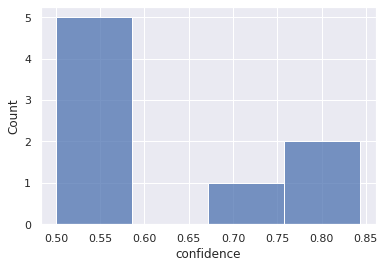

In [ ]:
# Setup seaborn
sns.set()

# Confidence results in visualization
sns.histplot(assc_rules['confidence'])

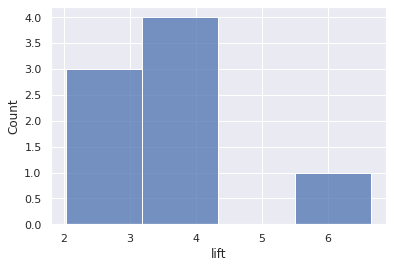

In [ ]:
# Lift Ratio results in visualization
sns.histplot(assc_rules['lift'])



> **Selecting Association Rules**



<img src='https://drive.google.com/uc?id=1BBBA-YTEznvhCg1j95HWVK0K--UvhjRQ' height="240px" width="auto">


In [ ]:
# We will choose a the best rules base on lift and mean of confidence
confidence_mean = assc_rules['confidence'].mean()
assc_rules[ (assc_rules['lift'] >= 2) &
       (assc_rules['confidence'] >= confidence_mean) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
4,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
6,(SPACEBOY LUNCH BOX ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427


In [ ]:
# Check popularity

popularity = {'Item': ['RED RETROSPOT CHARLOTTE BAG', 'WOODLAND CHARLOTTE BAG', 'ROUND SNACK BOXES SET OF 4 FRUITS',
                       'ROUND SNACK BOXES SET OF4 WOODLAND','SPACEBOY LUNCH BOX '],
              'Trx': [sets_basket['RED RETROSPOT CHARLOTTE BAG'].sum(),
                      sets_basket['WOODLAND CHARLOTTE BAG'].sum(),
                      sets_basket['ROUND SNACK BOXES SET OF 4 FRUITS '].sum(),
                      sets_basket['ROUND SNACK BOXES SET OF4 WOODLAND '].sum(),
                      sets_basket['SPACEBOY LUNCH BOX '].sum()]}
df = pd.DataFrame(data=popularity)
df.sort_values('Trx', ascending=False).reset_index()


,index,Item,Trx
0,3,ROUND SNACK BOXES SET OF4 WOODLAND,112
1,2,ROUND SNACK BOXES SET OF 4 FRUITS,72
2,1,WOODLAND CHARLOTTE BAG,58
3,4,SPACEBOY LUNCH BOX,47
4,0,RED RETROSPOT CHARLOTTE BAG,32


## E. Deployment

<img src='https://drive.google.com/uc?id=15tFkl8JOm9Nv04oczaAP4zpFi3BqQ3IP' height="240px" width="auto">